In [13]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
import seaborn as sns
from joblib import dump

RANDOM_STATE = 42

In [10]:
df = pd.read_csv("../data/audio/processed/audio_features.csv")

# cool visual for presenttion
# y, sr = librosa.load("../data/audio/raw/m4a_recordings/Drake.wav", sr=22050)
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# S_db = librosa.power_to_db(S, ref=np.max)
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel Spectrogram')
# plt.tight_layout()
# plt.show()

In [11]:
# slplit data into tain/testing + encode speaker names
x = df.drop(columns=["speaker", "session"], axis=1)
y = df["speaker"]
y_encoded = df["speaker"].map({"Drake":0, "Melissa":1, "Lisa":2, "Dan":3, "David":4})
groups = df["session"]

# auto target encoding?
# label_encoder = LabelEncoder()
# y_encoded2 = label_encoder.fit_transform(y)
# print("Classes:", label_encoder.classes_)

Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_8153_9d05a9d68f0c4371908e4dd43d132fd0_3b9ef7ffc578477e9b4e3568409127c9 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_8153_950a1317b1c84b059961683b6f5d3d89_8ba2f160e6054b679c959001fd48d6d0 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/minicon

SVC:
Best F1: 0.7674603242915662
Best Params: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'selector__k': 40}


Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_8153_b18c26698244440da0672e370aa3dd7b_6d1a0f590a1f4de88b6c66a5b7879c48 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_8153_950a1317b1c84b059961683b6f5d3d89_e8ae8218cbc947409761c4d7ee51be62 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/minicon

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1436
           1       0.97      0.95      0.96       958
           2       0.97      0.98      0.97      1257
           3       0.98      0.99      0.98      1916
           4       0.98      0.98      0.98      1375

    accuracy                           0.98      6942
   macro avg       0.98      0.97      0.97      6942
weighted avg       0.98      0.98      0.98      6942



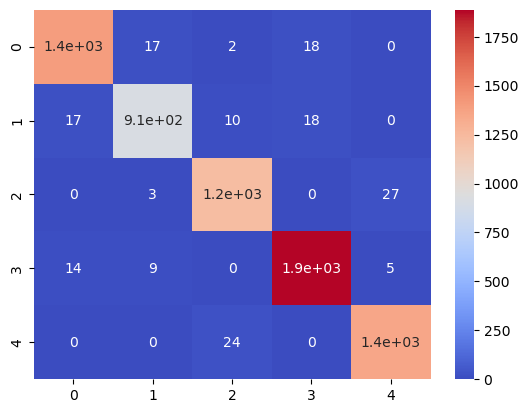

Selected Features:
Index(['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6',
       'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11',
       'chroma_12', 'contrast_1', 'contrast_2', 'contrast_3', 'contrast_4',
       'contrast_5', 'contrast_6', 'contrast_7', 'zcr', 'rms', 'mfcc_delta_1',
       'mfcc_delta_3', 'mfcc_delta_4', 'mfcc_delta_9', 'mfcc_delta_10',
       'mfcc_delta_12'],
      dtype='object')


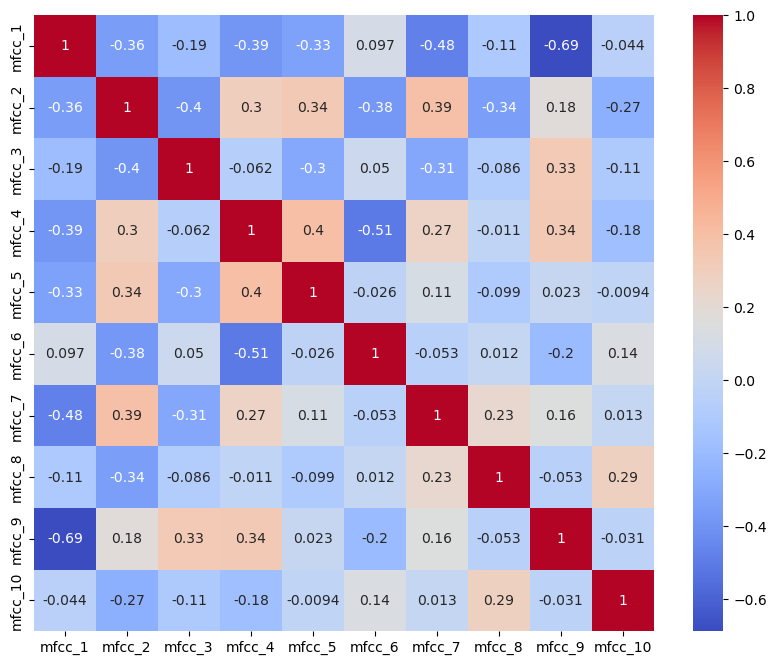

In [18]:
dt_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k=30)),
    ('classifier', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

dt_grid = {
    'selector__k': [20, 30],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__splitter': ['best', 'random']
}

rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k=40)),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])

rf_grid = {
    'selector__k': [20, 30, 40],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
}
    
gb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k=30)),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
])
    
gb_grid = {
    "selector__k": [20,30],
    "classifier__n_estimators": [100, 200],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth": [2, 3]
}

svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k=40)),
    ('classifier', SVC(probability=True))
])

svc_grid = {
    "selector__k": [20, 30, 40],
    "classifier__C": [0.1, 1, 10],
    "classifier__gamma": ["scale", "auto"],
    "classifier__kernel": ["rbf"]
}

gkfolds = GroupKFold(5)

# dt_search = GridSearchCV(dt_pipe, dt_grid, scoring="f1_macro", cv=gkfolds, n_jobs=-1)
# dt_search.fit(x, y_encoded, groups=groups)
# print("Decision Tree:")
# print(f"Best F1 Score: {dt_search.best_score_}")
# print(f"Best Params: {dt_search.best_params_}")

# rf_search = GridSearchCV(rf_pipe, rf_grid, scoring="f1_macro", cv=gkfolds, n_jobs=-1)
# rf_search.fit(x, y_encoded, groups=groups)
# print("Random Forest:")
# print(f"Best F1 Score: {rf_search.best_score_}")
# print(f"Best Params: {rf_search.best_params_}")

# gb_search = GridSearchCV(gb_pipe, gb_grid, scoring="f1_macro", cv=gkfolds, n_jobs=-1)
# gb_search.fit(x, y_encoded, groups=groups)
# print("Gradient Boosting:")
# print(f"Best F1 Score: {gb_search.best_score_}")
# print(f"Best Params: {gb_search.best_params_}")

svc_search = GridSearchCV(svc_pipe, svc_grid, scoring="f1_macro", cv=gkfolds, n_jobs=-1)
svc_search.fit(x, y_encoded, groups=groups)
print("SVC:")
print(f"Best F1: {svc_search.best_score_}")
print(f"Best Params: {svc_search.best_params_}")

# best model
# gb_model = gb_search.best_estimator_
best_model = svc_search.best_estimator_

# confusion matrix/metric report
y_predictedCV = cross_val_predict(svc_pipe, x, y_encoded, cv=gkfolds, groups=groups, n_jobs=-1)
print(classification_report(y_encoded, y_predictedCV))
cmatrix = confusion_matrix(y_encoded, y_predictedCV)
sns.heatmap(cmatrix, annot=True, cmap='coolwarm')
plt.show()

# correlations:
# mi = mutual_info_classif(x, y_encoded)

# # Create a DataFrame to view the results
# mi_df = pd.DataFrame({"Feature": x.columns, "Mutual Information": mi})
# mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)
# print(mi_df)


# selected features:
select_k_best = svc_search.best_estimator_.named_steps['selector']
selected_indices = select_k_best.get_support(indices=True)

# Map the indices back to the feature names (from X_train)
selected_features = x.columns[selected_indices]

print("Selected Features:")
print(selected_features)

top10_selected_feats = selected_features[:10]
corr_top10 = x[top10_selected_feats].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_top10, annot=True, cmap='coolwarm')
plt.show()

In [20]:
dump(best_model, "speech_rec_model.pkl")

['speech_rec_model.pkl']

Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-8153-7_lkkqu5 for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-8153-9563005f for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cl